In [1]:
!pip install lxml pandas numpy requests
import pandas as pd
import numpy as np

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
london_metro = pd.read_html("https://wiki.openstreetmap.org/wiki/List_of_London_Underground_stations", header=0)
londonMetro =london_metro[0]

In [3]:
londonMetro.head()

,Name,Latitude,Longitude,Platform / Entrance,Collected By,Collected On,Line,Step free
0,Acton Town,51.502500,-0.278126,Platform,User:Gagravarr,24/11/06,"District, Piccadilly",NaN
1,Acton Central,51.50883531,-0.263033174,Entrance,User:Firefishy,08/05/2007,London Overground,NaN
2,Acton Central,51.50856013,-0.262879534,Platform,User:Firefishy,08/05/2007,London Overground,NaN
3,Aldgate,51.51394,-0.07537,Aldgate High Street entrance,User:Morwen,28/4/2007,Metropolitan,No
4,Aldgate East,51.51514,-0.07178,Entrance,User:Parsingphase,(2006),"District, Hammersmith & City",NaN


In [4]:
df1 = londonMetro.drop(["Platform / Entrance", "Collected By", "Collected On", "Line", "Step free"], 1)
df1.head()

,Name,Latitude,Longitude
0,Acton Town,51.502500,-0.278126
1,Acton Central,51.50883531,-0.263033174
2,Acton Central,51.50856013,-0.262879534
3,Aldgate,51.51394,-0.07537
4,Aldgate East,51.51514,-0.07178


# Foursquare API

In [5]:
CLIENT_ID = 'S3QHDEYIGVYPM4MCAQQT5IBFH5F5OUMMBMSRNNX2LXWBYDLA' # your Foursquare ID
CLIENT_SECRET = 'B4MVCW2454SWOGKSAFSO4D0VMBCFWRTRHY3H1WVVOAZXDP1Z' # your Foursquare Secret
VERSION = '20200629'

In [6]:
import json
import requests
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()
len(results['response']['categories'])

10

In [7]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [8]:
def get_venues_count(lat,long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat, 
                long,
                radius,
                categoryId)
    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [9]:
#Create new dataframe to store venues data
stations_venues_df = df1.copy()
for c in categories_list:
    stations_venues_df[c[0]] = 0

In [10]:
stations_venues_df.head()

,Name,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Acton Town,51.502500,-0.278126,0,0,0,0,0,0,0,0,0,0
1,Acton Central,51.50883531,-0.263033174,0,0,0,0,0,0,0,0,0,0
2,Acton Central,51.50856013,-0.262879534,0,0,0,0,0,0,0,0,0,0
3,Aldgate,51.51394,-0.07537,0,0,0,0,0,0,0,0,0,0
4,Aldgate East,51.51514,-0.07178,0,0,0,0,0,0,0,0,0,0


In [11]:
#Request number of venues, store result as CSV
for i, row in stations_venues_df.iterrows():
    print(f"Now index is {i}")
    for c in categories_list:        
        try: 
            stations_venues_df.loc[i, c[0]] = get_venues_count(stations_venues_df.Latitude.iloc[i], stations_venues_df.Longitude.iloc[i], radius=10000, categoryId=c[1])
        except:
            pass
#         import pdb; pdb.set_trace()
    stations_venues_df.to_csv('stations_venues.csv')

Now index is 0
Now index is 1
Now index is 2
Now index is 3
Now index is 4
Now index is 5
Now index is 6
Now index is 7
Now index is 8
Now index is 9
Now index is 10
Now index is 11
Now index is 12
Now index is 13
Now index is 14
Now index is 15
Now index is 16
Now index is 17
Now index is 18
Now index is 19
Now index is 20
Now index is 21
Now index is 22
Now index is 23
Now index is 24
Now index is 25
Now index is 26
Now index is 27
Now index is 28
Now index is 29
Now index is 30
Now index is 31
Now index is 32
Now index is 33
Now index is 34
Now index is 35
Now index is 36
Now index is 37
Now index is 38
Now index is 39
Now index is 40
Now index is 41
Now index is 42
Now index is 43
Now index is 44
Now index is 45
Now index is 46
Now index is 47
Now index is 48
Now index is 49
Now index is 50
Now index is 51
Now index is 52
Now index is 53
Now index is 54
Now index is 55
Now index is 56
Now index is 57
Now index is 58
Now index is 59
Now index is 60
Now index is 61
Now index is 62
No

In [12]:
#Read already stored CSV
stations_venues_df = pd.read_csv('stations_venues.csv', index_col=0)
stations_venues_df.head()

,Name,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Acton Town,51.502500,-0.278126,0,73,7,246,243,0,163,0,186,184
1,Acton Central,51.50883531,-0.263033174,203,97,9,0,244,222,200,95,200,210
2,Acton Central,51.50856013,-0.262879534,203,98,9,248,244,223,199,95,199,210
3,Aldgate,51.51394,-0.07537,239,142,11,249,242,247,225,132,209,206
4,Aldgate East,51.51514,-0.07178,238,140,11,249,242,247,224,132,207,203


# Data Exploratory Analysis

Find the total number of each venue category

In [13]:
df2 = stations_venues_df.drop(["Name","Latitude", "Longitude"], 1)
df2.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0,73,7,246,243,0,163,0,186,184
1,203,97,9,0,244,222,200,95,200,210
2,203,98,9,248,244,223,199,95,199,210
3,239,142,11,249,242,247,225,132,209,206
4,238,140,11,249,242,247,224,132,207,203


In [14]:
df3 = df2.sum(axis=0)

In [15]:
!pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


                    Categories  Total number of each venue
0         Arts & Entertainment                         721
1         College & University                        1033
2                        Event                          16
3                         Food                        4196
4               Nightlife Spot                        2630
5        Outdoors & Recreation                        1793
6  Professional & Other Places                        1919
7                    Residence                         352
8               Shop & Service                        2253
9           Travel & Transport                        1802


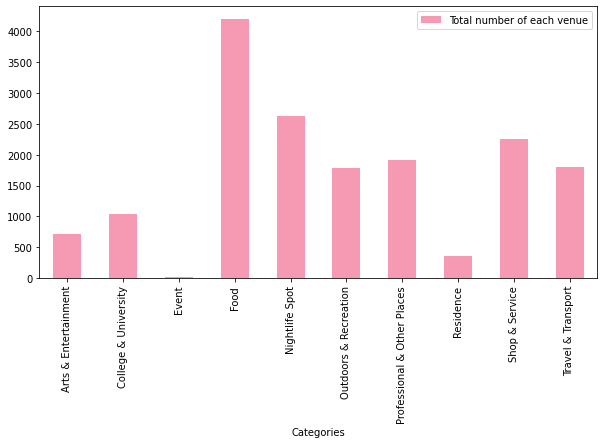

In [16]:
import matplotlib.pyplot as plt
venue_catergory = ['Arts & Entertainment', 'College & University', 'Event', 'Food', 'Nightlife Spot', 'Outdoors & Recreation', 'Professional & Other Places', 'Residence', 'Shop & Service', 'Travel & Transport'] 
venue_sum = [721, 1033, 16, 4196, 2630, 1793, 1919, 352, 2253, 1802] 
  
catergory_series = pd.Series(venue_catergory) 
sum_series = pd.Series(venue_sum) 
  
frame = { 'Categories': catergory_series, 'Total number of each venue': sum_series } 
  
result = pd.DataFrame(frame) 
  
print(result) 

result.plot.bar(x='Categories', figsize=(10,5), color='#F69AB4')
plt.show()

In [17]:
new_df = stations_venues_df.drop('Event', 1)
categories_list = list(filter(lambda x: x[0] != 'Event', categories_list))

The most frequent venue categories are professional, shop&service and food. Event has very little data, let's discard it from both the dataframe and the list of categories.

In [18]:
new_df.head()

,Name,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Acton Town,51.502500,-0.278126,0,73,246,243,0,163,0,186,184
1,Acton Central,51.50883531,-0.263033174,203,97,0,244,222,200,95,200,210
2,Acton Central,51.50856013,-0.262879534,203,98,248,244,223,199,95,199,210
3,Aldgate,51.51394,-0.07537,239,142,249,242,247,225,132,209,206
4,Aldgate East,51.51514,-0.07178,238,140,249,242,247,224,132,207,203


In [19]:
def clean_longitude(str_point: str):
    mono_signed_point = ""
    for char in str_point:
        if char.isnumeric() or char == "." or char == "-":
            mono_signed_point += char
    final = ""
    for i in range(len(mono_signed_point)):
        if i != 0 and mono_signed_point[i] == "-":
            break
        else:
            final += mono_signed_point[i]
    return final

In [20]:
new_df["Latitude"] = new_df["Latitude"].apply(clean_longitude)
new_df["Longitude"] = new_df["Longitude"].apply(clean_longitude)

In [21]:
new_df = new_df.reset_index().drop("index", 1)

In [22]:
for i, row in new_df.iterrows():
    try:
        float(row["Latitude"])
    except:
        print(row["Latitude"])
        print(row["Longitude"])
        break

In [23]:
new_df["Latitude"] = new_df["Latitude"].astype(float)
new_df["Longitude"] = new_df["Longitude"].astype(float)

In [24]:
categories_list

[('Arts & Entertainment', '4d4b7104d754a06370d81259'),
 ('College & University', '4d4b7105d754a06372d81259'),
 ('Food', '4d4b7105d754a06374d81259'),
 ('Nightlife Spot', '4d4b7105d754a06376d81259'),
 ('Outdoors & Recreation', '4d4b7105d754a06377d81259'),
 ('Professional & Other Places', '4d4b7105d754a06375d81259'),
 ('Residence', '4e67e38e036454776db1fb3a'),
 ('Shop & Service', '4d4b7105d754a06378d81259'),
 ('Travel & Transport', '4d4b7105d754a06379d81259')]

# Data Preprocessing

In [25]:
!pip install scikit-learn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
from sklearn.preprocessing import MinMaxScaler

X = new_df.values[:,3:]
cluster_dataset = MinMaxScaler().fit_transform(X)

In [27]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.000000,0.489933,0.984,0.983806,0.000000,0.705628,0.000000,0.794872,0.800000
1,0.825203,0.651007,0.000,0.987854,0.834586,0.865801,0.683453,0.854701,0.913043
2,0.825203,0.657718,0.992,0.987854,0.838346,0.861472,0.683453,0.850427,0.913043
3,0.971545,0.953020,0.996,0.979757,0.928571,0.974026,0.949640,0.893162,0.895652
4,0.967480,0.939597,0.996,0.979757,0.928571,0.969697,0.949640,0.884615,0.882609


Visualize the scaled data.

In [28]:
!pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


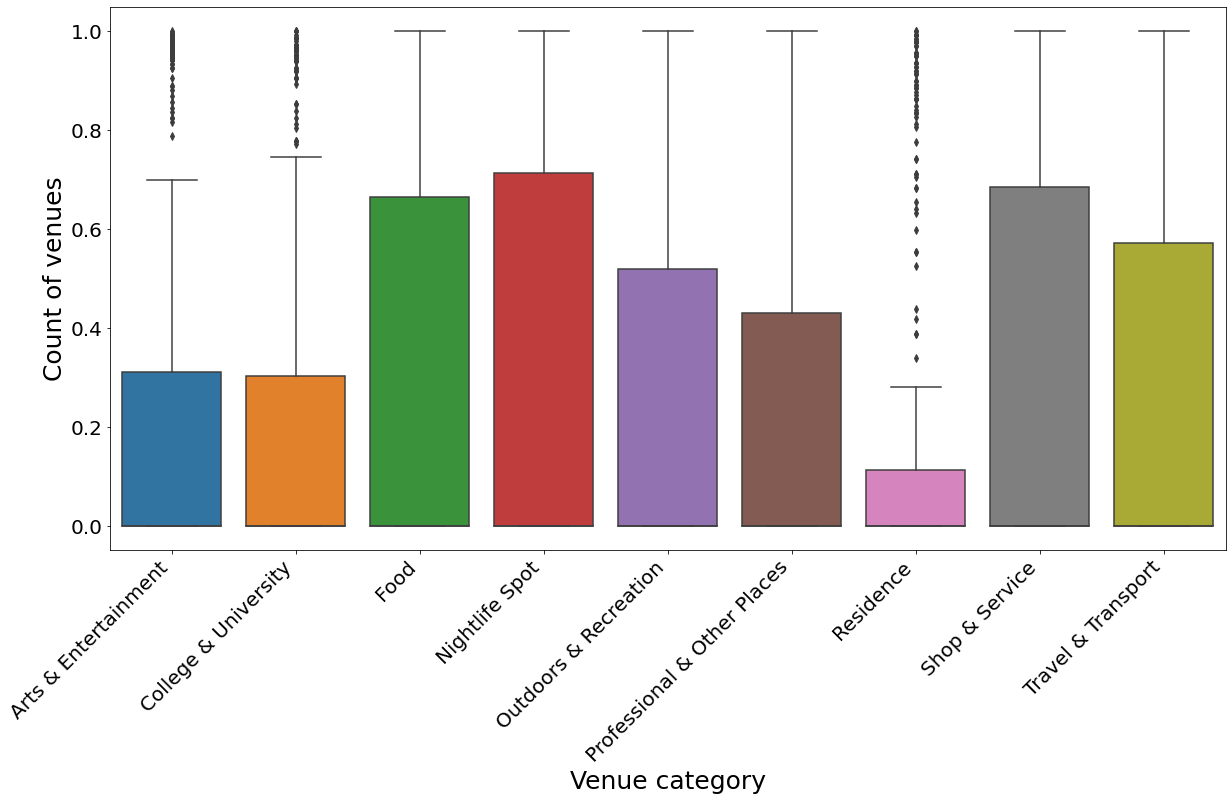

In [29]:
import seaborn as sns
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

# Clustering

We'll be using k-means clustering. These were preliminary results with different number of clusters:


In [30]:
from sklearn.cluster import KMeans
#set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
# Change label numbers so they go from highest scores to lowest
replace_labels = {0:2, 1:0, 2:3, 3:1}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

stations_clusters_df = stations_venues_df.copy()
stations_clusters_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df = cluster_df.copy()
stations_clusters_minmax_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df['Name'] = new_df['Name']
stations_clusters_minmax_df['Latitude'] = new_df['Latitude']
stations_clusters_minmax_df['Longitude'] = new_df['Longitude']

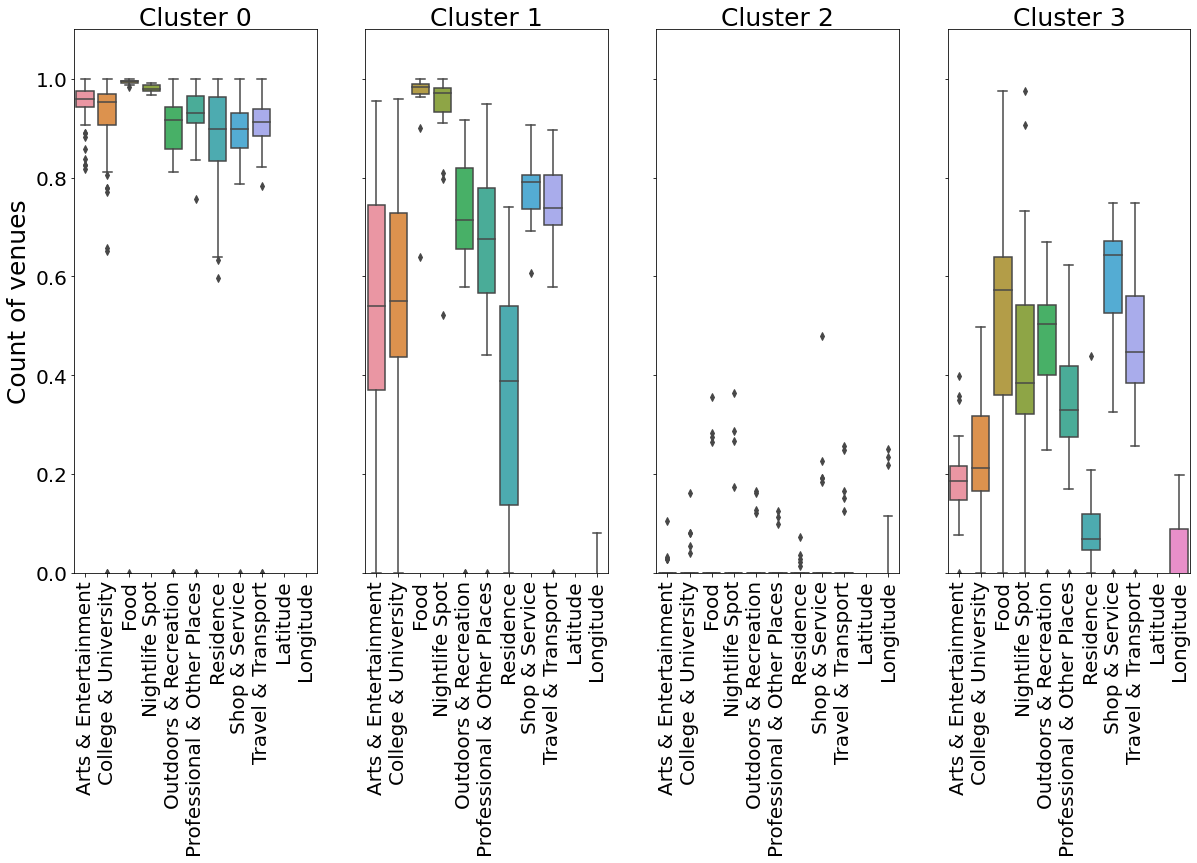

In [31]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [32]:
!pip install folium
import folium

You should consider upgrading via the 'pip install --upgrade pip' command.


In [33]:
london_location = [51.5074, -0.1278]
map_metro = folium.Map(location=london_location, zoom_start=10)

#add markers
for i, station, lat, long, cluster in zip(stations_clusters_minmax_df.index,
                                         stations_clusters_minmax_df['Name'],
                                         stations_clusters_minmax_df['Latitude'],
                                         stations_clusters_minmax_df['Longitude'],
                                         stations_clusters_minmax_df['Cluster']):
#latlong = [float(x) for x in coordinates.split(',')]    
#colors = sns.color_palette(None, kclusters).as_hex()
    colors=['orange','green','navy','red']
    #Calculate top 3 categories for each station
    station_series = stations_clusters_minmax_df.iloc[i]
    top_categories_dict = {}
    for cat in categories_list:
        top_categories_dict[cat[0]] = station_series[cat[0]]
    top_categories = sorted(top_categories_dict.items(), key = lambda x: x[1], reverse=True)
    popup='<b>{}</b><br>Cluster {}<br>1. {} {}<br>2. {} {}<br>3. {} {}'.format(
        station,
        cluster,
        top_categories[0][0],
        "{0:.2f}".format(top_categories[0][1]),
        top_categories[1][0],
        "{0:.2f}".format(top_categories[1][1]),
        top_categories[2][0],
        "{0:.2f}".format(top_categories[2][1]))
    
    folium.CircleMarker(
        location=(float(lat), float(long)),
        fill=True,
        fill_opacity=0.5,
        popup=folium.Popup(popup, max_width = 300),
        radius=2,
        color=colors[cluster]
    ).add_to(map_metro)
#     if i == 70:
#         print(station, lat, long, cluster)
#         break

map_metro